In [1]:
from Advertising.learners.greedyLearner import *
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.TS_no_qualities import *
from tqdm.autonotebook import tqdm
import itertools
seed = 6789
random.seed(seed)
only_first=False


lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')

adversary_bids = []
for _ in range(0, 10): 
    adversary_i_bids = []
    for _ in range(0, 5):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)

ts_learner = GTS_Learner(20, arms, variance=10, ad_id=1)
ts_learner2 = GTS_Learner(20, arms, variance=10, ad_id=1)

active_by_influence_reward = compute_array_estimated_influence(social_network, 2000)


Doing node number 0
Doing node number 1
Doing node number 2
Doing node number 3
Doing node number 4
Doing node number 5
Doing node number 6
Doing node number 7
Doing node number 8
Doing node number 9
Doing node number 10
Doing node number 11
Doing node number 12
Doing node number 13
Doing node number 14
Doing node number 15
Doing node number 16
Doing node number 17
Doing node number 18
Doing node number 19
Doing node number 20
Doing node number 21
Doing node number 22
Doing node number 23
Doing node number 24
Doing node number 25
Doing node number 26
Doing node number 27
Doing node number 28
Doing node number 29
Doing node number 30
Doing node number 31
Doing node number 32
Doing node number 33
Doing node number 34
Doing node number 35
Doing node number 36
Doing node number 37
Doing node number 38
Doing node number 39
Doing node number 40
Doing node number 41
Doing node number 42
Doing node number 43
Doing node number 44
Doing node number 45
Doing node number 46
Doing node number 47
Do

In [ ]:
arms = arms_creation(seed=30291, number_of_arms=20)
expected_values = []
expected_values2 = []





for j in range (0, 1):
    best_Arm = []
    print("This is TS number " + str(j))

    
    best_arm, best_arm_index, number_of_pulls, expected_values, thing_to_plot = test(ts_learner, arms, adversary_bids, only_first, active_by_influence_reward, 500, lambdas, social_network)
    best_arm2, best_arm_index2, number_of_pulls2, expected_values2, thing_to_plot2 = test(ts_learner2, arms, adversary_bids, not only_first, active_by_influence_reward, 500, lambdas, social_network)



    print("Valori non solo prima posizione:")
    print(best_arm)
    print(number_of_pulls)
    print(expected_values)

    print("Valori solo prima posizione:")
    print(best_arm2)
    print(number_of_pulls2)
    print(expected_values2)


THE BEST ARM FOR EXPERIMENT TOTAL IS: [3 1 2 2 3] INDEX 18
THE BEST ARM FOR EXPERIMENT ONLY FIRST IS: [1 3 3 1 4] INDEX 3


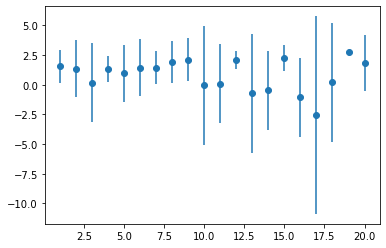

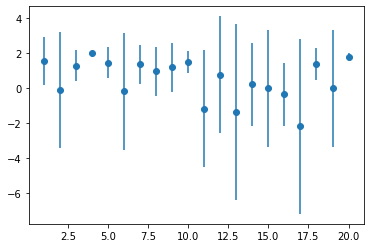

In [2]:
# plt.figure(0)
# plt.xlabel('round')
# plt.ylabel('reward')
# plt.plot(learner.collected_rewards)
# plt.show()

print("THE BEST ARM FOR EXPERIMENT TOTAL IS:", arms[best_arm_index], "INDEX",best_arm_index)
print("THE BEST ARM FOR EXPERIMENT ONLY FIRST IS:", arms[best_arm_index2], "INDEX",best_arm_index2)

array = [i+1 for i in range(0, 20)]



plt.figure(1)
plt.errorbar(array, expected_values, yerr=(1/ts_learner.tau0)*5, fmt='o')
plt.figure(0)
plt.errorbar(array, expected_values2, yerr=(1/ts_learner2.tau0)*5, fmt='o')
    
plt.show()
